In [1]:
from cosmikyu import maps, config
from cosmikyu import transforms as cmk_transforms
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from pixell import enmap, enplot
from orphics import maps as omaps

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

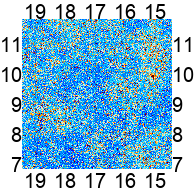

In [11]:
output_dir = config.default_data_dir
def output_path(x):
    return os.path.join(output_dir, x)

res_arcmin = 2.0
shape = (150, 150)
stamp_dir = output_path("stamp_{}arcmin_{}x{}".format(res_arcmin, shape[0], shape[1]))

#SS = maps.StampedSky(stamp_dir, res_arcmin, shape)
meta = np.loadtxt(output_path('ir_pts/148_meta.txt'))
PS = cmk_transforms.TakePS(bin_edges=np.linspace(0,7000,200), shape=shape)
#NN = cmk_transforms.Normalize(meta)
#UN = cmk_transforms.UnNormalize(meta)
TE = cmk_transforms.ToEnmap()
composed = transforms.Compose([PS,TE])
#composed = transforms.Compose([NN, TE])
SSDS = maps.StampedSkyDataSet(stamp_dir, 3000, res_arcmin, 'ir_pts', 148, shape, transform=composed)

SSDS[0].keys()
enplot.pshow(SSDS[4]['map'], downgrade=1)

In [3]:
LS = cmk_transforms.LogScale()
np.mean(LS.__call__(SSDS[30])['data'])



meta = np.loadtxt(output_path('ir_pts/030_meta.txt'))
sample = SSDS[5]
#sample['data'] = np.ones(sample['data'].shape)*-1
omap = enmap.enmap(sample['data'], wcs=sample['wcs'])

#oloc = np.where(omap > 0)
NN = cmk_transforms.Normalize(meta)
UN = cmk_transforms.UnNormalize(meta)
TE = cmk_transforms.ToEnmap()
TT = cmk_transforms.Taper(shape)
UT = cmk_transforms.UnTaper(shape)
PS = cmk_transforms.TakePS(bin_edges=np.linspace(0,7000,200), shape=shape)
ops = PS.__call__(sample)['ps']

sample = PS.__call__((TE.__call__(UN.__call__(NN.__call__(sample)))))
fmap = sample['map']
floc = np.where(fmap < 0)
print(np.max(omap), np.min(omap))
print(np.max(fmap), np.min(fmap))
print(np.max(np.abs(np.nan_to_num((fmap-omap)/omap))))
enplot.pshow(omap, downgrade=1)
enplot.pshow(fmap, downgrade=1)
enplot.pshow(omap-fmap, downgrade=1)

#print(sample['ps'])
plt.plot(sample['ps'][0], ops[1]/sample['ps'][1])
plt.show()

plt.plot(sample['ps'][0], ops[1])
plt.show()

KeyError: 'data'